### 模型评估

- **模型评估（Model Evaluation）**

- **模型评估主要分为离散评估和在线评估（针对分类、回归、排序、序列预测等问题）**

- **评估指标的局限性**

> **精准率的局限性：当不同类别的样本比例不均衡时，占比大的类别往往将影响其精准率**

> **精准率与召回率的权衡：**

> **精准率指分类正确的正样本个数占分类器判定为正样本的样本个数比例**

> **召回率指分类正确的正样本个数占真正的正样本个数的比例**

> **为了评估一个排序模型的好坏，不仅要看模型在不同的 Top N下的 Precision N 和 Recall N 同时还要绘制出模型的 P-R 曲线，通过 P-R 曲线的整体表现，对模型进行全面的评估**

> **ROC曲线（二值分类问题）：ROC曲线的横坐标为 假阳性率 FPR 纵坐标为真阳性率 TPR 其中 FPR = FP/N TPR = TP/P 其中，P为真实正样本数量 N为真实负样本数量 TP 是P个样本中被分类器预测为正样本的个数，FP 是N个负样本中被分类器预测为正样本的个数**

> **AUC的计算：AUC 指 ROC 曲线下的面积大小，其值能够量化的反映基于ROC曲线衡量出的模型性能**

> **ROC曲线与P-R曲线的特点：相比 P-R 曲线，当正负样本的分布发生变化时，ROC曲线的形状能够基本保持不变，而 P-R 曲线的形状一般会发生剧烈变化；如果选择不同的测试集， ROC 曲线能更加稳定的反映模型本身的好坏， 而 P-R 曲线能够直观的反映在特定数据集上的表现性能**

### 任务说明：

- 利用 **金融数据** 来预测贷款用户是否会逾期
- 其中，**“status”** 是结果标签：**0** 表示未逾期，**1** 表示逾期

### 任务要求：

> **模型评估（Model Evaluation）**


### 任务实现（模型评估）：（2 Days）


- **记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于精确率Accuracy、准确率Precision，召回率Recall和F1-score、AUC值的评分表格，并画出ROC曲线**

### 4.1 数据加载

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 数据集的加载
data = pd.read_csv('Dataset/data.csv')
# 剔除重复特征
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [5]:
import pickle

# 载入特征
with open('feature.pkl', 'rb') as f:
    X = pickle.load(f)

# 观测正负样本是否均衡
y = data.status
y.value_counts()

0    3561
1    1193
Name: status, dtype: int64

In [6]:
X

,regional_mobility,student_feature,is_high_user,avg_consume_less_12_valid_month,reg_preference_for_trad,first_transaction_time_year,first_transaction_time_month,first_transaction_time_day,latest_query_time_year,latest_query_time_month,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,3.0,-1.0,0,7.0,0,2013,8,17,2018.0,4.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,4.0,1.0,0,5.0,0,2016,4,2,2018.0,5.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,1.0,-1.0,0,5.0,0,2017,6,17,2018.0,5.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,3.0,-1.0,0,7.0,1,2013,5,16,2018.0,5.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,1.0,-1.0,0,6.0,0,2017,3,12,2018.0,4.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,3.0,1.0,0,6.0,1,2016,9,20,2018.0,5.0,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,2.0,-1.0,0,6.0,0,2016,11,12,2018.0,5.0,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,2.0,-1.0,0,8.0,0,2015,5,12,2018.0,4.0,...,3100.0,1810.0,7700.0,79.0,4.0,5.0,13800.0,7050.0,14.0,36.0
8,2.0,-1.0,0,8.0,1,2015,2,18,2018.0,4.0,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,2.0,1.0,0,7.0,0,2017,1,5,2018.0,4.0,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


### 4.2 划分数据集

In [7]:
# 划分数据集（训练集和测试集7:3 无验证集）
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

# 特征归一化处理
std = StandardScaler()
X_train = std.fit_transform(X_train.values)
X_test = std.transform(X_test.values)

### 4.3 模型评估

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测训练集和测试集
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率Accuracy
    print('【Accuracy准确率】', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率Precision
    print('【Prediction精准率】', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率Recall
    print('【Recall召回率】', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('【F1-score】', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC取值
    print('【AUC取值】', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC Curve")

### 4.4 导入不同分类器模型

> ### 逻辑回归、SVM、决策树、随机森林、XGBoost

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

> ###  4.4.1 Logistic Regresssion 逻辑回归

In [15]:
lr = LogisticRegression(C = 0.1, penalty = 'l1')

【Accuracy准确率】 训练集： 0.7977 测试集： 0.8094
【Prediction精准率】 训练集： 0.7227 测试集： 0.7547
【Recall召回率】 训练集： 0.3226 测试集： 0.3399
【F1-score】 训练集： 0.4461 测试集： 0.4688
【AUC取值】 训练集： 0.8023 测试集： 0.7980


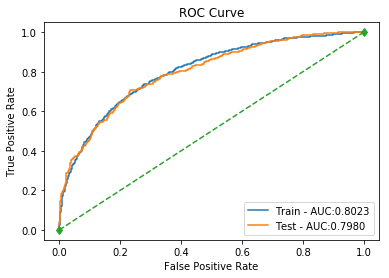

In [16]:
lr.fit(X_train, y_train.values)
model_metrics(lr, X_train, X_test, y_train, y_test)

> ### 4.4.2 SVM 支持向量机

> #### 线性核函数 svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)

In [19]:
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True)

【Accuracy准确率】 训练集： 0.7854 测试集： 0.7919
【Prediction精准率】 训练集： 0.7763 测试集： 0.8256
【Recall召回率】 训练集： 0.2107 测试集： 0.2011
【F1-score】 训练集： 0.3315 测试集： 0.3235
【AUC取值】 训练集： 0.8042 测试集： 0.8097


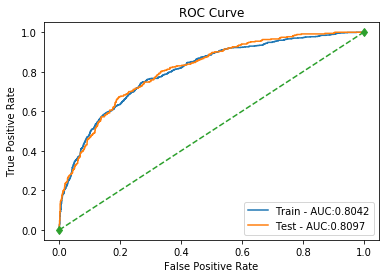

In [20]:
svm_linear.fit(X_train, y_train.values)
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

> #### 多元线性核函数 svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)

In [21]:
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True)

【Accuracy准确率】 训练集： 0.7532 测试集： 0.7554
【Prediction精准率】 训练集： 0.9524 测试集： 0.7500
【Recall召回率】 训练集： 0.0238 测试集： 0.0170
【F1-score】 训练集： 0.0465 测试集： 0.0332
【AUC取值】 训练集： 0.8689 测试集： 0.7220


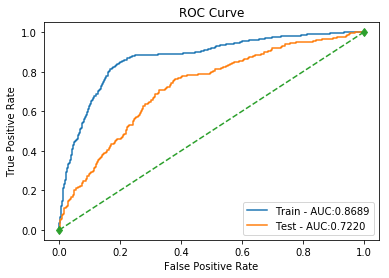

In [22]:
svm_poly.fit(X_train, y_train.values)
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

> #### 径向基函数 svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)

In [23]:
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True)

【Accuracy准确率】 训练集： 0.7475 测试集： 0.7526
【Prediction精准率】 训练集： 0.0000 测试集： 0.0000
【Recall召回率】 训练集： 0.0000 测试集： 0.0000
【F1-score】 训练集： 0.0000 测试集： 0.0000
【AUC取值】 训练集： 0.8603 测试集： 0.7941


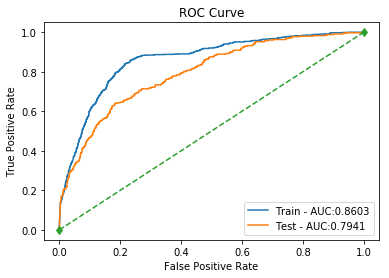

In [24]:
svm_rbf.fit(X_train, y_train.values)
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

> #### 非线性sigmoid核函数 svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

In [25]:
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)

【Accuracy准确率】 训练集： 0.7475 测试集： 0.7526
【Prediction精准率】 训练集： 0.0000 测试集： 0.0000
【Recall召回率】 训练集： 0.0000 测试集： 0.0000
【F1-score】 训练集： 0.0000 测试集： 0.0000
【AUC取值】 训练集： 0.7768 测试集： 0.8011


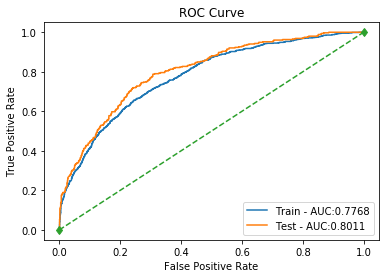

In [26]:
svm_sigmoid.fit(X_train, y_train.values)
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

> ### 4.4.3 Decision Tree 决策树

In [27]:
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=50,min_samples_leaf=60, max_features=9, random_state =2018)

【Accuracy准确率】 训练集： 0.7869 测试集： 0.7765
【Prediction精准率】 训练集： 0.6446 测试集： 0.5885
【Recall召回率】 训练集： 0.3476 测试集： 0.3201
【F1-score】 训练集： 0.4517 测试集： 0.4147
【AUC取值】 训练集： 0.7726 测试集： 0.7432


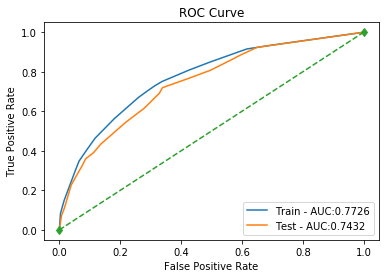

In [28]:
dt.fit(X_train, y_train.values)
model_metrics(dt, X_train, X_test, y_train, y_test)

> ### 4.4.4 Random Forests 随机森林

In [29]:
rf = RandomForestClassifier(oob_score=True, random_state=2018)

【Accuracy准确率】 训练集： 0.9823 测试集： 0.7821
【Prediction精准率】 训练集： 0.9975 测试集： 0.6479
【Recall召回率】 训练集： 0.9321 测试集： 0.2606
【F1-score】 训练集： 0.9637 测试集： 0.3717
【AUC取值】 训练集： 0.9996 测试集： 0.7090


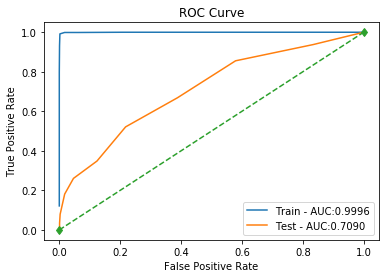

In [30]:
rf.fit(X_train, y_train.values)
model_metrics(rf, X_train, X_test, y_train, y_test)

> ### 4.4.5 XGBoost

In [31]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=80, max_depth=3, min_child_weight=5,\
                    gamma=0.2, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-5,\
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27)

【Accuracy准确率】 训练集： 0.8392 测试集： 0.7947
【Prediction精准率】 训练集： 0.8308 测试集： 0.6667
【Recall召回率】 训练集： 0.4560 测试集： 0.3399
【F1-score】 训练集： 0.5888 测试集： 0.4503
【AUC取值】 训练集： 0.8947 测试集： 0.7989


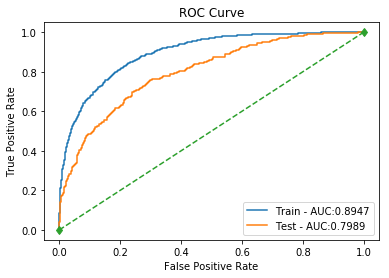

In [32]:
xgb.fit(X_train, y_train.values)
model_metrics(xgb, X_train, X_test, y_train, y_test)

### Conclusion

> ### Discussion 

> #### SVM：RBF vs. Sigmoid中的查准率（精准率）、查全率（召回率）和F1-Score皆为0，原因出在哪里？？

|模型|参数|准确率|精确率|召回率|F1-Score|AUC取值|ROC曲线|
|:---|:---|:---|:---|:---|:---|:---||:---|
|LR逻辑回归|LogisticRegression(C = 0.1, penalty = 'l1')|训练集： 0.7977 测试集： 0.8094|训练集： 0.7227 测试集： 0.7547|训练集： 0.3226 测试集： 0.3399|训练集： 0.4461 测试集： 0.4688|训练集：0.7978 测试集：0.8031|<img align="right" style="padding-right:1px;" src="ROC-LR.png">|
|svm_linear|svm.SVC(C = 0.01, kernel = 'linear', probability=True)|训练集： 0.7839 测试集： 0.7898|训练集： 0.7713 测试集： 0.8046|训练集： 0.2048 测试集： 0.1983|训练集： 0.3236 测试集： 0.3182|训练集： 0.8023 测试集： 0.7980|<img align="right" style="padding-right:1px;" src="ROC-LINEAR.png">|
|svm_poly|svm.SVC(C = 0.01, kernel = 'poly', probability=True)|训练集： 0.7532 测试集： 0.7554|训练集： 0.9524 测试集： 0.7500|训练集： 0.0238 测试集： 0.0170|训练集： 0.0465 测试集： 0.0332|训练集： 0.8689 测试集： 0.7220|<img align="right" style="padding-right:1px;" src="ROC-POLY.png">|
|svm_rbf|svm.SVC(gamma = 0.01, C =0.01 , probability=True)|训练集： 0.7475 测试集： 0.7526|训练集： 0.0000 测试集： 0.0000|训练集： 0.0000 测试集： 0.0000|训练集： 0.0000 测试集： 0.0000|训练集： 0.8603 测试集： 0.7941|<img align="right" style="padding-right:1px;" src="ROC-RBF.png">|
|svm_sigmoid|svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)|训练集： 0.7475 测试集： 0.7526|训练集： 0.0000 测试集： 0.0000|训练集： 0.0000 测试集： 0.0000|训练集： 0.0000 测试集： 0.0000|训练集： 0.7768 测试集： 0.8011|<img align="right" style="padding-right:1px;" src="ROC-SIGMOID.png">|
|决策树|DecisionTreeClassifier(max_depth=11,min_samples_split=550,min_samples_leaf=80,max_features=19)|训练集： 0.7869 测试集： 0.7765|训练集： 0.6446 测试集： 0.5885|训练集： 0.3476 测试集： 0.3201|训练集： 0.4517 测试集： 0.4147|训练集： 0.7726 测试集： 0.7432|<img align="right" style="padding-right:1px;" src="ROC-DT.png">|
|随机森林|RandomForestClassifier(oob_score=True, random_state=2018)|训练集： 0.9823 测试集： 0.7821|训练集： 0.9975 测试集： 0.6479|训练集： 0.9321 测试集： 0.2606|训练集： 0.9637 测试集： 0.3717|训练集： 0.9996 测试集： 0.7090|<img align="right" style="padding-right:1px;" src="ROC-RF.png">|
|XGBoost|XGBClassifier(learning_rate =0.01, n_estimators=180, max_depth=3, min_child_weight=5,gamma=0.4, subsample=0.5, colsample_bytree=0.9, reg_alpha=1, objective= 'binary:logistic',nthread=4,scale_pos_weight=1, seed=27)|训练集： 0.8392 测试集： 0.7947|训练集： 0.8308 测试集： 0.6667|训练集： 0.4560 测试集： 0.3399|训练集： 0.5888 测试集： 0.4503|训练集： 0.8947 测试集： 0.7989|<img align="right" style="padding-right:1px;" src="ROC-XGBOOST.png">|

> #### 利用不同的数据挖掘算法，构建不同的模型，通过对比模型评估之间的差异，可以进一步利用考虑模型调参和模型融合的方法改善模型性能